In [34]:
# usual imports in a classic ML pipeline for Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# additional metrics ONLY for classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [35]:
# load the data
df = pd.read_csv("healthcare-dataset-stroke-data.csv")


# let's quickly see the first 5 rows of data
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [36]:
# Check value counts for gender before modifying ordinal categories
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [37]:
# Check total no of records
df.shape


(5110, 12)

In [38]:
# drop id field since it is not required
df.drop(columns=['id'], inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [39]:
# check duplicates and missing values
df.duplicated().sum()

np.int64(0)

In [40]:
# do we have missing values? apparently not
# dataset can't have any missing values when passing the data
# to the machine learning algorithm
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [41]:
# Dro NAs
df.dropna(inplace=True)


In [42]:
# do we have missing values? apparently not
# dataset can't have any missing values when passing the data
# to the machine learning algorithm
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [43]:
# Check total no of records
df.shape

(4909, 11)

In [44]:
# Check value counts for ShelveLoc before modifying ordinal categories
df['ever_married'].value_counts()

ever_married
Yes    3204
No     1705
Name: count, dtype: int64

In [45]:
# Check value counts for gender before modifying ordinal categories
df['gender'].value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [46]:
# Remove the row where gender= Other
df = df[df['gender'] != 'Other']
df['gender'].value_counts()


gender
Female    2897
Male      2011
Name: count, dtype: int64

In [47]:
# Check value counts for ShelveLoc before modifying ordinal categories
df['Residence_type'].value_counts()

Residence_type
Urban    2490
Rural    2418
Name: count, dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder

# list all variables that can be binary-converted
variables = ['ever_married','gender','Residence_type']

# load the encoder
encoder = LabelEncoder()

# convert the listed variables
df[variables] = df[variables].apply(encoder.fit_transform)

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
5,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1


In [49]:
# Check value counts for work_type before modifying ordinal categories
df['work_type'].value_counts()

work_type
Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64

In [50]:
# remove the records of Neve_worked since it is an outlier
df = df[df['work_type'] != 'Never_worked']
df['work_type'].value_counts()

work_type
Private          2810
Self-employed     775
children          671
Govt_job          630
Name: count, dtype: int64

In [51]:
# converts work_type into binary since it is a nominal category
variables 
from sklearn.preprocessing import OneHotEncoder
variables = ['work_type']
# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.6,formerly smoked,1,0,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,never smoked,1,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.4,smokes,1,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.0,never smoked,1,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,formerly smoked,1,0,1,0,0


In [52]:
# Check value counts for ShelveLoc before modifying ordinal categories
df['smoking_status'].value_counts()

smoking_status
never smoked       1838
Unknown            1475
formerly smoked     836
smokes              737
Name: count, dtype: int64

In [53]:
# converts smoking_status into binary since it is a nominal category
variables 
from sklearn.preprocessing import OneHotEncoder
variables = ['smoking_status']
# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,1,0,0


<h3>There's no ordinal or nominal categories here, we can proceed to X/y -phase</h3>

In [54]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,1,0,0


<h3>X/y and train/test -splits</h3>

In [55]:
# first step, we split our data into SUPPORT variables and the TARGET variable
# X => support variables, y => target variable

# X => list of support variables the model uses 
# while predicting the target variable with the model
X = df.drop("stroke", axis=1)

# our target variable is y
y = df["stroke"]

In [56]:
# secondly, train/test -split with scikit-learn's helper function
# 0.3 for testing => 30% of data is reserved for testing purposes
# and based on that => it's deduced that 70% will be in the training data

# you can also define the random state, which is sometimes useful
# if you want to "lock down" all the randomness in order to get same results every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [57]:
# initialize the scaler and process X-values
# IN MOST CASES you can experiment with StandardScaler or MinMaxWScaler
# BUT ONLY USE ONE SCALER AT A TIME FOR SUPPORT VARIABLES
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# FIT the scaler only to X-training data
# and only transform the test data with that
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
# you can inspect how the original values have now 
# switched to the scaled ones
# X_train

<h3>Train the logistic regression model</h3>

In [59]:
# create the model and train it with the data
model = LogisticRegression()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

<h3>Classification error metrics</h3>

In [60]:
# we need to create test predictions based on our earlier reserved test dataset
# this data has never been seen by the model by now
predictions = model.predict(X_test)

In [61]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1409
           1       0.00      0.00      0.00        57

    accuracy                           0.96      1466
   macro avg       0.48      0.50      0.49      1466
weighted avg       0.92      0.96      0.94      1466


Model overall accuracy: 96.11%


c:\Users\Gayani\OneDrive - lucit\IntroToML\IntroductionToMLMethods\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Gayani\OneDrive - lucit\IntroToML\IntroductionToMLMethods\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Gayani\OneDrive - lucit\IntroToML\IntroductionToMLMethods\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisio

<Axes: >

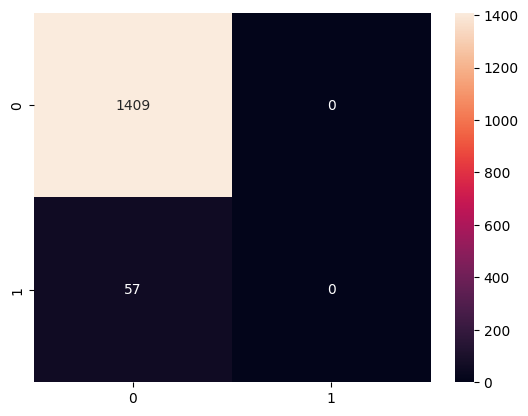

In [62]:
# see the confusion matrix
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

In [63]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary logistic regression, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multinomial logistic regression , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# basically 0.5 means you could get the same result with just random guessing
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.8161941404255848

<h3>Using the model in practice</h3>

In [64]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='str')

In [65]:
# map all variables from the user
# variable names MUST match training dataset columns

tester_row = {
    'gender': 1,                     # 0 = Female, 1 = Male
    'age': 67.0,
    'hypertension': 0,               # 0 = No, 1 = Yes
    'heart_disease': 1,              # 0 = No, 1 = Yes
    'ever_married': 1,               # 0 = No, 1 = Yes
    'Residence_type': 1,             # 0 = Rural, 1 = Urban
    'avg_glucose_level': 228.69,
    'bmi': 36.6,

    # One-hot encoded work_type
    'work_type_Govt_job': 0,
    'work_type_Private': 1,
    'work_type_Self-employed': 0,
    'work_type_children': 0,

    # One-hot encoded smoking_status
    'smoking_status_Unknown': 0,
    'smoking_status_formerly smoked': 1,
    'smoking_status_never smoked': 0,
    'smoking_status_smokes': 0
}

# convert to pandas DataFrame
tester_row = pd.DataFrame([tester_row])

# SINCE WE SCALED our support variables earlier
# WE HAVE TO DO IT HERE AS WELL
tester_row = sc.transform(tester_row)


In [66]:
print("All probabilities by category:")
print(model.predict_proba(tester_row))
print()

# change these based on your original data
labels = ["No", "Yes"]

print("Does this person have the heart stroke (Yes/No):")
result = labels[model.predict(tester_row)[0]]
print(result)
print("-------------------")

All probabilities by category:
[[0.77946493 0.22053507]]

Does this person have the heart stroke (Yes/No):
No
-------------------
